In [1]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv(r"C:\Users\DeveshNarain\deep_learning_codebasics\datasets\WA_Fn-UseC_-Telco-Customer-Churn.csv")
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


<h3>Data Exploration</h3>

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [4]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [5]:
df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [6]:
# removing customerID
df.drop(["customerID"],axis=1,inplace=True)

In [7]:
df

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [8]:
pd.to_numeric(df.TotalCharges,errors='coerce')

0         29.85
1       1889.50
2        108.15
3       1840.75
4        151.65
         ...   
7038    1990.50
7039    7362.90
7040     346.45
7041     306.60
7042    6844.50
Name: TotalCharges, Length: 7043, dtype: float64

In [9]:
pd.to_numeric(df.TotalCharges,errors='coerce').isnull()

0       False
1       False
2       False
3       False
4       False
        ...  
7038    False
7039    False
7040    False
7041    False
7042    False
Name: TotalCharges, Length: 7043, dtype: bool

In [10]:
df[pd.to_numeric(df.TotalCharges,errors='coerce').isnull()]

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
753,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
936,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
1082,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No
1340,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No
3331,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,No
3826,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No
4380,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No
5218,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No
6670,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,No


In [11]:
df[pd.to_numeric(df.TotalCharges,errors='coerce').isnull()].shape

(11, 20)

In [12]:
df1 = df[pd.to_numeric(df.TotalCharges,errors='coerce').isnull() == False]

In [13]:
pd.to_numeric(df1.TotalCharges)

0         29.85
1       1889.50
2        108.15
3       1840.75
4        151.65
         ...   
7038    1990.50
7039    7362.90
7040     346.45
7041     306.60
7042    6844.50
Name: TotalCharges, Length: 7032, dtype: float64

In [14]:
df1.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [15]:
df1.TotalCharges = pd.to_numeric(df1.TotalCharges)

C:\Users\DeveshNarain\AppData\Local\Temp\ipykernel_3496\973151263.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.TotalCharges = pd.to_numeric(df1.TotalCharges)


In [16]:
df1.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object

In [17]:
df1[df1.Churn == 'Yes']

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
5,Female,0,No,No,8,Yes,Yes,Fiber optic,No,No,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.50,Yes
8,Female,0,Yes,No,28,Yes,Yes,Fiber optic,No,No,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes
13,Male,0,No,No,49,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Bank transfer (automatic),103.70,5036.30,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7021,Male,0,No,No,12,Yes,No,DSL,No,No,No,Yes,Yes,No,One year,Yes,Electronic check,59.80,727.80,Yes
7026,Female,0,No,No,9,Yes,No,DSL,No,No,No,No,No,No,Month-to-month,Yes,Bank transfer (automatic),44.20,403.35,Yes
7032,Male,1,No,No,1,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,75.75,75.75,Yes
7034,Female,0,No,No,67,Yes,Yes,Fiber optic,Yes,Yes,Yes,No,Yes,No,Month-to-month,Yes,Credit card (automatic),102.95,6886.25,Yes


In [18]:
df1[df1.Churn == 'No']

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
6,Male,0,No,Yes,22,Yes,Yes,Fiber optic,No,Yes,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.40,No
7,Female,0,No,No,10,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.90,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7037,Female,0,No,No,72,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,Yes,Bank transfer (automatic),21.15,1419.40,No
7038,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,No
7039,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,No
7040,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No


<h3>Data Visualization</h3>

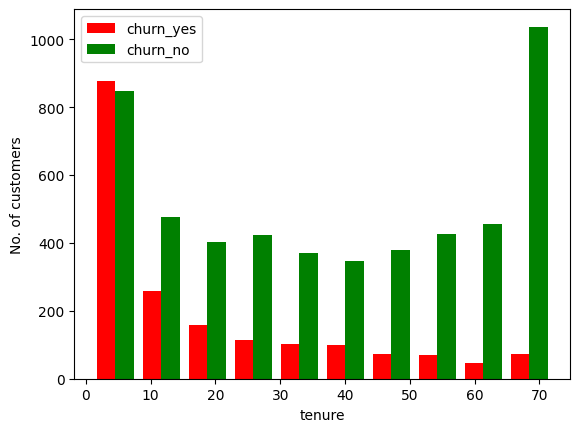

In [19]:
# churn w.r.t tenure
tenure_churn_yes = df1[df1.Churn=='Yes'].tenure
tenure_churn_no = df1[df1.Churn=='No'].tenure

plt.hist([tenure_churn_yes,tenure_churn_no],label=["churn_yes","churn_no"],color=['red','green'])
plt.xlabel("tenure")
plt.ylabel("No. of customers")
plt.legend()

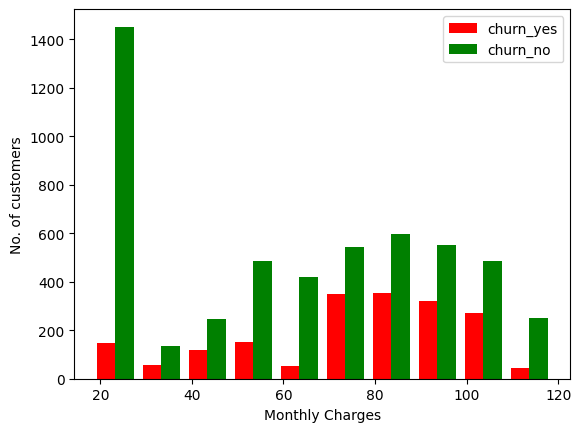

In [20]:
# churn w.r.t monthly charges
monthlyCharges_churn_yes = df1[df1.Churn=='Yes'].MonthlyCharges
monthlyCharges_churn_no = df1[df1.Churn=='No'].MonthlyCharges

plt.hist([monthlyCharges_churn_yes,monthlyCharges_churn_no],label=["churn_yes","churn_no"],color=['red','green'])
plt.xlabel("Monthly Charges")
plt.ylabel("No. of customers")
plt.legend()

In [21]:
# print uniques values of each column
def print_unique_values(df1):
    for i in df1.columns:
        if df1[i].dtype=='object':
            print(f"{i}: {df1[i].unique()}")

In [22]:
print_unique_values(df1)

gender: ['Female' 'Male']
Partner: ['Yes' 'No']
Dependents: ['No' 'Yes']
PhoneService: ['No' 'Yes']
MultipleLines: ['No phone service' 'No' 'Yes']
InternetService: ['DSL' 'Fiber optic' 'No']
OnlineSecurity: ['No' 'Yes' 'No internet service']
OnlineBackup: ['Yes' 'No' 'No internet service']
DeviceProtection: ['No' 'Yes' 'No internet service']
TechSupport: ['No' 'Yes' 'No internet service']
StreamingTV: ['No' 'Yes' 'No internet service']
StreamingMovies: ['No' 'Yes' 'No internet service']
Contract: ['Month-to-month' 'One year' 'Two year']
PaperlessBilling: ['Yes' 'No']
PaymentMethod: ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn: ['No' 'Yes']


In [23]:
df1["MultipleLines"].replace('No phone service','No',inplace=True)

C:\Users\DeveshNarain\AppData\Local\Temp\ipykernel_3496\1031995384.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1["MultipleLines"].replace('No phone service','No',inplace=True)


In [24]:
cols_to_replace = ["OnlineSecurity","OnlineBackup","DeviceProtection","TechSupport","StreamingTV","StreamingMovies"]
for i in cols_to_replace:
    df1[i].replace("No internet service","No",inplace=True)

C:\Users\DeveshNarain\AppData\Local\Temp\ipykernel_3496\2754901371.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1[i].replace("No internet service","No",inplace=True)


In [25]:
print_unique_values(df1)

gender: ['Female' 'Male']
Partner: ['Yes' 'No']
Dependents: ['No' 'Yes']
PhoneService: ['No' 'Yes']
MultipleLines: ['No' 'Yes']
InternetService: ['DSL' 'Fiber optic' 'No']
OnlineSecurity: ['No' 'Yes']
OnlineBackup: ['Yes' 'No']
DeviceProtection: ['No' 'Yes']
TechSupport: ['No' 'Yes']
StreamingTV: ['No' 'Yes']
StreamingMovies: ['No' 'Yes']
Contract: ['Month-to-month' 'One year' 'Two year']
PaperlessBilling: ['Yes' 'No']
PaymentMethod: ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn: ['No' 'Yes']


In [26]:
df2 = pd.get_dummies(df1,columns=["InternetService","Contract","PaymentMethod"])

In [27]:
df2.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,Female,0,Yes,No,1,No,No,No,Yes,No,...,1,0,0,1,0,0,0,0,1,0
1,Male,0,No,No,34,Yes,No,Yes,No,Yes,...,1,0,0,0,1,0,0,0,0,1
2,Male,0,No,No,2,Yes,No,Yes,Yes,No,...,1,0,0,1,0,0,0,0,0,1
3,Male,0,No,No,45,No,No,Yes,No,Yes,...,1,0,0,0,1,0,1,0,0,0
4,Female,0,No,No,2,Yes,No,No,No,No,...,0,1,0,1,0,0,0,0,1,0


In [28]:
yes_no_cols = ['Partner','Dependents','PhoneService','MultipleLines','OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport',
               'StreamingTV','StreamingMovies','PaperlessBilling','Churn']
for i in yes_no_cols:
    df2[i].replace({"Yes":1,"No":0},inplace=True)

In [29]:
df2['gender'].replace({"Female":1,"Male":0},inplace=True)

In [30]:
df2.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,1,0,1,0,1,0,0,0,1,0,...,1,0,0,1,0,0,0,0,1,0
1,0,0,0,0,34,1,0,1,0,1,...,1,0,0,0,1,0,0,0,0,1
2,0,0,0,0,2,1,0,1,1,0,...,1,0,0,1,0,0,0,0,0,1
3,0,0,0,0,45,0,0,1,0,1,...,1,0,0,0,1,0,1,0,0,0
4,1,0,0,0,2,1,0,0,0,0,...,0,1,0,1,0,0,0,0,1,0


In [31]:
for i in df2:
    print(f"{i}: {df2[i].unique()}")

gender: [1 0]
SeniorCitizen: [0 1]
Partner: [1 0]
Dependents: [0 1]
tenure: [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26 39]
PhoneService: [0 1]
MultipleLines: [0 1]
OnlineSecurity: [0 1]
OnlineBackup: [1 0]
DeviceProtection: [0 1]
TechSupport: [0 1]
StreamingTV: [0 1]
StreamingMovies: [0 1]
PaperlessBilling: [1 0]
MonthlyCharges: [29.85 56.95 53.85 ... 63.1  44.2  78.7 ]
TotalCharges: [  29.85 1889.5   108.15 ...  346.45  306.6  6844.5 ]
Churn: [0 1]
InternetService_DSL: [1 0]
InternetService_Fiber optic: [0 1]
InternetService_No: [0 1]
Contract_Month-to-month: [1 0]
Contract_One year: [0 1]
Contract_Two year: [0 1]
PaymentMethod_Bank transfer (automatic): [0 1]
PaymentMethod_Credit card (automatic): [0 1]
PaymentMethod_Electronic check: [1 0]
PaymentMethod_Mailed check: [0 1]


In [32]:
df2.dtypes

gender                                       int64
SeniorCitizen                                int64
Partner                                      int64
Dependents                                   int64
tenure                                       int64
PhoneService                                 int64
MultipleLines                                int64
OnlineSecurity                               int64
OnlineBackup                                 int64
DeviceProtection                             int64
TechSupport                                  int64
StreamingTV                                  int64
StreamingMovies                              int64
PaperlessBilling                             int64
MonthlyCharges                             float64
TotalCharges                               float64
Churn                                        int64
InternetService_DSL                          uint8
InternetService_Fiber optic                  uint8
InternetService_No             

<h3>Scaling</h3>

In [33]:
# minmax scaling brings the values of the reamining 2 numerical columns to a range of 0-1 as the other column values are 0 or 1
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
cols_to_scale = ['tenure','TotalCharges','MonthlyCharges']
df2[cols_to_scale] = scaler.fit_transform(df2[cols_to_scale])

In [34]:
for i in df2:
    print(f"{i}: {df2[i].unique()}")

gender: [1 0]
SeniorCitizen: [0 1]
Partner: [1 0]
Dependents: [0 1]
tenure: [0.         0.46478873 0.01408451 0.61971831 0.09859155 0.29577465
 0.12676056 0.38028169 0.85915493 0.16901408 0.21126761 0.8028169
 0.67605634 0.33802817 0.95774648 0.71830986 0.98591549 0.28169014
 0.15492958 0.4084507  0.64788732 1.         0.22535211 0.36619718
 0.05633803 0.63380282 0.14084507 0.97183099 0.87323944 0.5915493
 0.1971831  0.83098592 0.23943662 0.91549296 0.11267606 0.02816901
 0.42253521 0.69014085 0.88732394 0.77464789 0.08450704 0.57746479
 0.47887324 0.66197183 0.3943662  0.90140845 0.52112676 0.94366197
 0.43661972 0.76056338 0.50704225 0.49295775 0.56338028 0.07042254
 0.04225352 0.45070423 0.92957746 0.30985915 0.78873239 0.84507042
 0.18309859 0.26760563 0.73239437 0.54929577 0.81690141 0.32394366
 0.6056338  0.25352113 0.74647887 0.70422535 0.35211268 0.53521127]
PhoneService: [0 1]
MultipleLines: [0 1]
OnlineSecurity: [0 1]
OnlineBackup: [1 0]
DeviceProtection: [0 1]
TechSupport: [

<h3>Model Building</h3>

In [35]:
X = df2.drop(['Churn'],axis=1)
y = df2.Churn

In [36]:
from sklearn.model_selection import train_test_split
Xtrain,Xtest,ytrain,ytest = train_test_split(X,y,test_size=0.2,random_state=21)

In [37]:
Xtrain.shape

(5625, 26)

In [38]:
Xtest.shape

(1407, 26)

In [39]:
from keras.models import Sequential
from keras.layers import Dense,InputLayer
model = Sequential([
    InputLayer(shape=(26,)),
    Dense(26,activation='relu'),
    Dense(30,activation='relu'),
    Dense(1,activation='sigmoid')])

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy']
             )
model.fit(Xtrain,ytrain,epochs=100)

Epoch 1/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.6345 - loss: 0.5977
Epoch 2/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7892 - loss: 0.4347
Epoch 3/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8021 - loss: 0.4202
Epoch 4/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8017 - loss: 0.4157
Epoch 5/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8096 - loss: 0.4030
Epoch 6/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8065 - loss: 0.4166
Epoch 7/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8181 - loss: 0.3931
Epoch 8/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8088 - loss: 0.4076
Epoch 9/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8065 - loss: 0.4096
Epoch 10/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8040 - loss: 0.4091
Epoch 11/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8120 - loss: 0.4023
Epoch 12/100
176/176 ━━━━━━━━━━━━━━━━━━━━

In [40]:
model.evaluate(Xtest,ytest)

44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7745 - loss: 0.5021


[0.48639389872550964, 0.7761194109916687]

In [41]:
yp = model.predict(Xtest)
yp

44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


array([[0.98687047],
       [0.41550398],
       [0.11019586],
       ...,
       [0.4145826 ],
       [0.34860483],
       [0.5734485 ]], dtype=float32)

In [42]:
ypred = []
for i in yp:
    if i >= 0.5:
        ypred.append(1)
    else:
        ypred.append(0)

In [43]:
ypred[:5]

[1, 0, 0, 0, 1]

In [44]:
from sklearn.metrics import classification_report
print(classification_report(ytest,ypred))

              precision    recall  f1-score   support

           0       0.82      0.88      0.85      1007
           1       0.63      0.51      0.57       400

    accuracy                           0.78      1407
   macro avg       0.73      0.70      0.71      1407
weighted avg       0.77      0.78      0.77      1407



Text(50.722222222222214, 0.5, 'True')

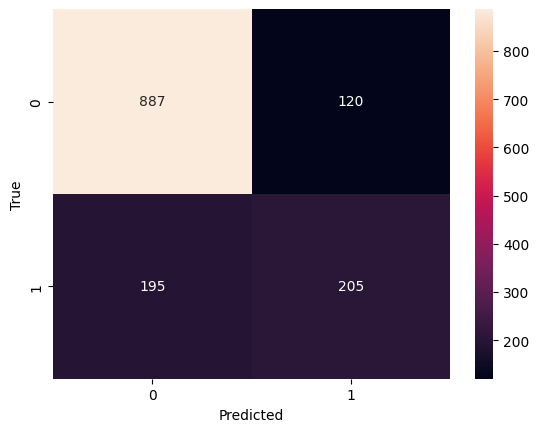

In [45]:
cm = tf.math.confusion_matrix(labels=ytest, predictions=ypred)
sns.heatmap(cm,annot=True,fmt='d')
plt.xlabel("Predicted")
plt.ylabel("True")

In [46]:
# accuracy
(920+178)/(920+222+178+87)

0.7803837953091685

In [47]:
# precision of getting 1
178/(178+87)

0.6716981132075471

In [48]:
# recalll of getting 1
178/(178+222)

0.445

# Part 21: Handling imbalance in the dataset

In [49]:
df2["Churn"].value_counts()
# imbalance in the dataset

0    5163
1    1869
Name: Churn, dtype: int64

<h4>accuracy does not matter when there is imbalance in the dataset and the imbalance can be indicated using F1-score or precision or recall of the two classes</h4>

<h3>method1: Random Undersampling</h3>

In [50]:
df2.Churn.value_counts()

0    5163
1    1869
Name: Churn, dtype: int64

In [51]:
count_class_0,count_class_1 = df2.Churn.value_counts()
count_class_0, count_class_1

(5163, 1869)

In [52]:
df_class_0 = df2[df2["Churn"] == 0]
df_class_1 = df2[df2["Churn"] == 1]

In [53]:
df_class_0.shape

(5163, 27)

In [54]:
df_class_0_under = df_class_0.sample(count_class_1)

In [55]:
df_under = pd.concat([df_class_0_under,df_class_1],axis=0)

In [56]:
df_under.Churn.value_counts()

0    1869
1    1869
Name: Churn, dtype: int64

In [57]:
df_under.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3738 entries, 3648 to 7041
Data columns (total 27 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   gender                                   3738 non-null   int64  
 1   SeniorCitizen                            3738 non-null   int64  
 2   Partner                                  3738 non-null   int64  
 3   Dependents                               3738 non-null   int64  
 4   tenure                                   3738 non-null   float64
 5   PhoneService                             3738 non-null   int64  
 6   MultipleLines                            3738 non-null   int64  
 7   OnlineSecurity                           3738 non-null   int64  
 8   OnlineBackup                             3738 non-null   int64  
 9   DeviceProtection                         3738 non-null   int64  
 10  TechSupport                              3738

In [58]:
X = df_under.drop(["Churn"],axis=1)
y = df_under["Churn"]

In [59]:
Xtrain,Xtest,ytrain,ytest = train_test_split(X,y,test_size=0.2,random_state=5,stratify=y)
# stratifying y will help in ensuring an equal class distribution in both test and training data

In [60]:
ytrain.value_counts()

1    1495
0    1495
Name: Churn, dtype: int64

In [61]:
ytest.value_counts()

0    374
1    374
Name: Churn, dtype: int64

In [62]:
from keras.models import Sequential
from keras.layers import Dense,InputLayer
model = Sequential([
    InputLayer(shape=(26,)),
    Dense(26,activation='relu'),
    Dense(30,activation='relu'),
    Dense(1,activation='sigmoid')])

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy']
             )
model.fit(Xtrain,ytrain,epochs=100)

Epoch 1/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.6007 - loss: 0.6689
Epoch 2/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7395 - loss: 0.5245
Epoch 3/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7560 - loss: 0.4967
Epoch 4/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7632 - loss: 0.4942
Epoch 5/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7691 - loss: 0.4802
Epoch 6/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7715 - loss: 0.4761
Epoch 7/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7692 - loss: 0.4835
Epoch 8/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7633 - loss: 0.4750
Epoch 9/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7763 - loss: 0.4599
Epoch 10/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7664 - loss: 0.4717
Epoch 11/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7606 - loss: 0.4817
Epoch 12/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy:

In [63]:
ypred = model.predict(Xtest)
ypred = np.round(ypred)
ypred[:5]

24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


array([[0.],
       [1.],
       [0.],
       [1.],
       [1.]], dtype=float32)

In [64]:
ytest[:5]

2515    0
3000    1
69      0
4124    0
2629    1
Name: Churn, dtype: int64

In [65]:
print(classification_report(ytest,ypred))

              precision    recall  f1-score   support

           0       0.75      0.72      0.74       374
           1       0.73      0.76      0.75       374

    accuracy                           0.74       748
   macro avg       0.74      0.74      0.74       748
weighted avg       0.74      0.74      0.74       748



<h3>method2: Random Oversampling</h3>

In [66]:
df_class_1_over = df_class_1.sample(count_class_0,replace=True)
df_over = pd.concat([df_class_1_over,df_class_0],axis=0)
# oversamples class one sampling by creating duplicates

In [67]:
df_over.Churn.value_counts()

1    5163
0    5163
Name: Churn, dtype: int64

In [68]:
X = df_over.drop(["Churn"],axis=1)
y = df_over["Churn"]

In [69]:
Xtrain,Xtest,ytrain,ytest = train_test_split(X,y,test_size=0.2,random_state=5,stratify=y)
# stratifying y will help in ensuring an equal class distribution in both test and training data

In [70]:
ytrain.value_counts()

0    4130
1    4130
Name: Churn, dtype: int64

In [71]:
ytest.value_counts()

1    1033
0    1033
Name: Churn, dtype: int64

In [72]:
from keras.models import Sequential
from keras.layers import Dense,InputLayer
model = Sequential([
    InputLayer(shape=(26,)),
    Dense(26,activation='relu'),
    Dense(30,activation='relu'),
    Dense(1,activation='sigmoid')])

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy']
             )
model.fit(Xtrain,ytrain,epochs=100)

Epoch 1/100
259/259 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7028 - loss: 0.5811
Epoch 2/100
259/259 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7515 - loss: 0.4981
Epoch 3/100
259/259 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7645 - loss: 0.4836
Epoch 4/100
259/259 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.7678 - loss: 0.4741
Epoch 5/100
259/259 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7683 - loss: 0.4774
Epoch 6/100
259/259 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.7611 - loss: 0.4787
Epoch 7/100
259/259 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.7658 - loss: 0.4789
Epoch 8/100
259/259 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7674 - loss: 0.4671
Epoch 9/100
259/259 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.7884 - loss: 0.4576
Epoch 10/100
259/259 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7761 - loss: 0.4647
Epoch 11/100
259/259 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7749 - loss: 0.4584
Epoch 12/100
259/259 ━━━━━━━━━━━━━━━━━━━━

In [73]:
ypred = model.predict(Xtest)
ypred = np.round(ypred)
ypred[:5]

65/65 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step


array([[1.],
       [1.],
       [1.],
       [0.],
       [0.]], dtype=float32)

In [74]:
ytest[:5]

5300    1
5306    1
5475    1
3372    0
1254    0
Name: Churn, dtype: int64

In [75]:
print(classification_report(ytest,ypred))

              precision    recall  f1-score   support

           0       0.86      0.73      0.79      1033
           1       0.76      0.88      0.82      1033

    accuracy                           0.80      2066
   macro avg       0.81      0.80      0.80      2066
weighted avg       0.81      0.80      0.80      2066



<h3>method3: SMOTE</h3>

In [79]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(sampling_strategy="minority")

X_sm,y_sm = smote.fit_resample(X,y)
y_sm.value_counts()

1    5163
0    5163
Name: Churn, dtype: int64

In [89]:
Xtrain,Xtest,ytrain,ytest = train_test_split(X_sm,y_sm,test_size=0.20,random_state=2,stratify=y_sm)

In [90]:
ytrain.value_counts()

0    4130
1    4130
Name: Churn, dtype: int64

In [91]:
model = Sequential([
    InputLayer(shape=(26,)),
    Dense(26,activation='relu'),
    Dense(30,activation='relu'),
    Dense(1,activation='sigmoid')])

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy']
             )
model.fit(Xtrain,ytrain,epochs=100)

Epoch 1/100
259/259 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.6930 - loss: 0.5822
Epoch 2/100
259/259 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7587 - loss: 0.4939
Epoch 3/100
259/259 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7621 - loss: 0.4879
Epoch 4/100
259/259 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7659 - loss: 0.4843
Epoch 5/100
259/259 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7807 - loss: 0.4646
Epoch 6/100
259/259 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7775 - loss: 0.4641
Epoch 7/100
259/259 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7727 - loss: 0.4708
Epoch 8/100
259/259 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7675 - loss: 0.4739
Epoch 9/100
259/259 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7745 - loss: 0.4647
Epoch 10/100
259/259 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7829 - loss: 0.4565
Epoch 11/100
259/259 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7854 - loss: 0.4552
Epoch 12/100
259/259 ━━━━━━━━━━━━━━━━━━━━

In [92]:
ypred = model.predict(Xtest)
ypred = np.round(ypred)
ypred[:5]

65/65 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


array([[1.],
       [1.],
       [0.],
       [1.],
       [0.]], dtype=float32)

In [93]:
print(classification_report(ytest,ypred))

              precision    recall  f1-score   support

           0       0.85      0.76      0.81      1033
           1       0.78      0.87      0.82      1033

    accuracy                           0.82      2066
   macro avg       0.82      0.82      0.82      2066
weighted avg       0.82      0.82      0.82      2066



<h3>method4: Ensemble</h3>

In [94]:
df2.Churn.value_counts()

0    5163
1    1869
Name: Churn, dtype: int64

In [100]:
X = df2.drop(["Churn"],axis=1)
y = df2["Churn"]

In [101]:
Xtrain,Xtest,ytrain,ytest = train_test_split(X,y,test_size=0.20,random_state=2,stratify=y)

In [102]:
ytrain.value_counts()

0    4130
1    1495
Name: Churn, dtype: int64

In [105]:
4130/1495
# class1 = 1/3 times of class 0 thus we will be dividing the class0 into 3 sets

2.762541806020067

In [106]:
df3 = Xtrain.copy()
df3["Churn"] = ytrain

In [108]:
df3_class0 = df3[df3["Churn"] == 0]
df3_class1 = df3[df3.Churn == 1]

In [110]:
def train_ensemble(df_minority,df_majority,start,end):
    df_train = pd.concat([df_majority[start:end],df_minority],axis=0)
    Xtrain = df_train.drop(["Churn"],axis=1)
    ytrain = df_train["Churn"]
    return Xtrain,ytrain

In [111]:
Xtrain,ytrain = train_ensemble(df3_class1,df3_class0,0,1495)

In [112]:
model = Sequential([
    InputLayer(shape=(26,)),
    Dense(26,activation='relu'),
    Dense(30,activation='relu'),
    Dense(1,activation='sigmoid')])

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy']
             )
model.fit(Xtrain,ytrain,epochs=100)

Epoch 1/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.6146 - loss: 0.6538
Epoch 2/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7409 - loss: 0.5246
Epoch 3/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7602 - loss: 0.4958
Epoch 4/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7695 - loss: 0.4874
Epoch 5/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7479 - loss: 0.5029
Epoch 6/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7590 - loss: 0.4852
Epoch 7/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7699 - loss: 0.4777
Epoch 8/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7651 - loss: 0.4809
Epoch 9/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7614 - loss: 0.4824
Epoch 10/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7641 - loss: 0.4813
Epoch 11/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7556 - loss: 0.4801
Epoch 12/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy:

In [121]:
ypred1 = model.predict(Xtest)
ypred1 = np.round(ypred1)
ypred1[:5]

44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


array([[0.],
       [1.],
       [1.],
       [1.],
       [1.]], dtype=float32)

In [122]:
ypred1.shape

(1407, 1)

In [123]:
ytest.shape

(1407,)

In [124]:
print(classification_report(ytest,ypred1))

              precision    recall  f1-score   support

           0       0.90      0.69      0.78      1033
           1       0.48      0.79      0.60       374

    accuracy                           0.72      1407
   macro avg       0.69      0.74      0.69      1407
weighted avg       0.79      0.72      0.73      1407



In [125]:
2*1495

2990

In [126]:
# sample 2
Xtrain,ytrain = train_ensemble(df3_class1,df3_class0,1495,2990)

In [127]:
model = Sequential([
    InputLayer(shape=(26,)),
    Dense(26,activation='relu'),
    Dense(30,activation='relu'),
    Dense(1,activation='sigmoid')])

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy']
             )
model.fit(Xtrain,ytrain,epochs=100)

Epoch 1/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.5862 - loss: 0.6626
Epoch 2/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7320 - loss: 0.5360
Epoch 3/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7340 - loss: 0.5213
Epoch 4/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7596 - loss: 0.5068
Epoch 5/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7575 - loss: 0.5035
Epoch 6/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7597 - loss: 0.4924
Epoch 7/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7557 - loss: 0.4918
Epoch 8/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7614 - loss: 0.4844
Epoch 9/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7643 - loss: 0.4837
Epoch 10/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7648 - loss: 0.4900
Epoch 11/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7603 - loss: 0.4810
Epoch 12/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy:

In [128]:
ypred2 = model.predict(Xtest)
ypred2 = np.round(ypred2)
ypred2[:5]

44/44 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step


array([[0.],
       [1.],
       [1.],
       [1.],
       [1.]], dtype=float32)

In [129]:
ypred2.shape

(1407, 1)

In [130]:
print(classification_report(ytest,ypred2))

              precision    recall  f1-score   support

           0       0.87      0.79      0.83      1033
           1       0.54      0.67      0.60       374

    accuracy                           0.76      1407
   macro avg       0.70      0.73      0.71      1407
weighted avg       0.78      0.76      0.77      1407



In [133]:
# sample 3
Xtrain,ytrain = train_ensemble(df3_class1,df3_class0,2990,4130)

In [134]:
model = Sequential([
    InputLayer(shape=(26,)),
    Dense(26,activation='relu'),
    Dense(30,activation='relu'),
    Dense(1,activation='sigmoid')])

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy']
             )
model.fit(Xtrain,ytrain,epochs=100)

Epoch 1/100
83/83 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.6137 - loss: 0.6536
Epoch 2/100
83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7552 - loss: 0.5069
Epoch 3/100
83/83 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7598 - loss: 0.4955
Epoch 4/100
83/83 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7780 - loss: 0.4657
Epoch 5/100
83/83 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.7811 - loss: 0.4534
Epoch 6/100
83/83 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7614 - loss: 0.4736
Epoch 7/100
83/83 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7660 - loss: 0.4783
Epoch 8/100
83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7843 - loss: 0.4628
Epoch 9/100
83/83 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7697 - loss: 0.4687
Epoch 10/100
83/83 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7821 - loss: 0.4618
Epoch 11/100
83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7774 - loss: 0.4587
Epoch 12/100
83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy:

In [135]:
ypred3 = np.round(model.predict(Xtest))
ypred3.shape

44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


(1407, 1)

In [136]:
print(classification_report(ytest,ypred3))

              precision    recall  f1-score   support

           0       0.92      0.64      0.75      1033
           1       0.46      0.84      0.60       374

    accuracy                           0.69      1407
   macro avg       0.69      0.74      0.67      1407
weighted avg       0.80      0.69      0.71      1407



<h3>voting majority</h3>
Suppose
vote1 = 0,
vote2 = 1,
vote3 = 1,
then outcome is one so if no. of ones > 1 then the output will be 1

In [137]:
y_pred_final = ypred1.copy()
for i in range(len(ypred1)):
    n_ones = ypred1[i] + ypred2[i] + ypred3[i]
    if n_ones > 1:
        y_pred_final[i] = 1
    else:
        y_pred_final[i] = 0

In [139]:
print(classification_report(ytest,y_pred_final))
# not that good but we can run different experiments with these 4 sampling techniques to find out which one gives the best result

              precision    recall  f1-score   support

           0       0.91      0.72      0.80      1033
           1       0.51      0.79      0.62       374

    accuracy                           0.74      1407
   macro avg       0.71      0.76      0.71      1407
weighted avg       0.80      0.74      0.75      1407

